In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df=pd.read_csv('IMDB Dataset.csv')
df=df[:100]

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['sentiment'].value_counts()

sentiment
negative    58
positive    42
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

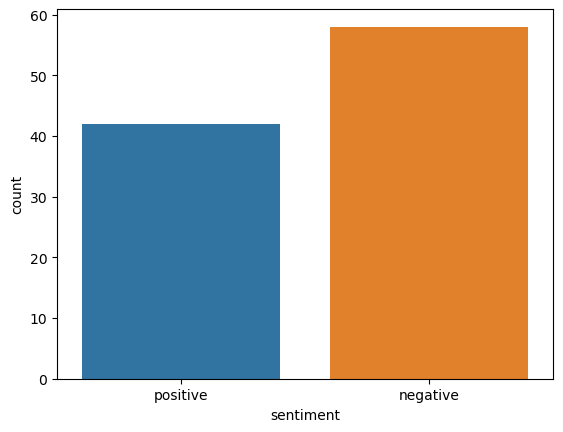

In [5]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)

In [6]:
positive_review=list(df[df['sentiment']=='positive']['review'])
negative_review=list(df[df['sentiment']=='negative']['review'])

In [7]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 

In [8]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

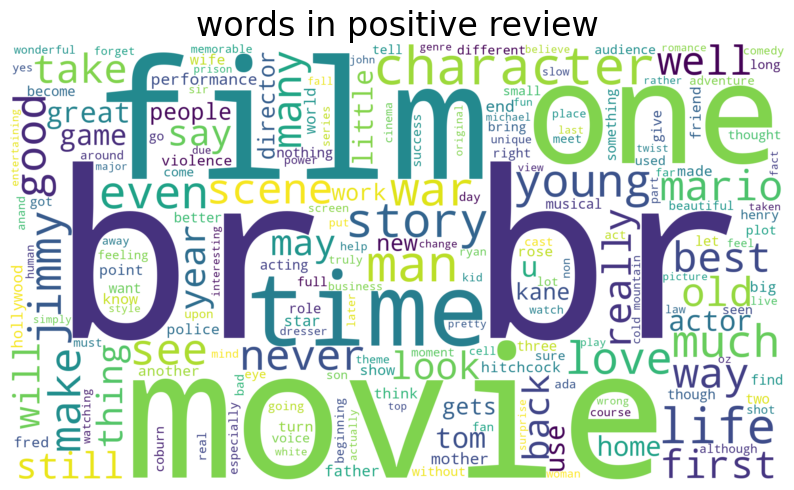

In [9]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

In [10]:
def text_processing(data):
    from bs4 import BeautifulSoup # Removes all html tag when we take data from google or other sources
    import re   # re means regets which is comparatively faster
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase) # re helps to find pattern
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm  # tqdm basically progress means how much time needs to be completed
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in data['review'].values:
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
        
        # We can use 2 type lemmatization and stemming
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_reviews:
      list1=[]
      for words in sentence.split():
        list1.append(porter.stem(words)) # Gives the root words like making--> make, cleaning-->clean

      list2.append(' '.join(list1)) 
    return(list2)
# Lemmatization is the two words has same meaning like better--> good, went --> go

In [11]:
x=text_processing(df)

In [12]:
df['cleaned_review']=x

In [13]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [14]:
df_x=df['review']
df_y=df['sentiment']

In [15]:
df_x.shape

(100,)

In [16]:
df_y.shape

(100,)

In [17]:
df.corr()

ValueError: could not convert string to float: "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."